In [1]:
!pip install transformers
!pip install sentencepiece
!pip install loguru
!pip install rouge-score
!pip install peft

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=9247c69a46cf71a524ea0c68d0af513da16bd948c030d749c050e01ae09917e1
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 7.8 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
%cd drive/MyDrive/projects/compositional-reasoning-finetuning

/content/drive/MyDrive/projects/compositional-reasoning-finetuning


## Git

# Study The Effect of Finetuning on Model Performance

In [4]:
from analysis import load_results, plot_context_size_distributions, correlate_context_size, load_responses
from data_loaders import load_TestData
import pandas as pd

In [ ]:
macro_results = load_results(macro=True)
macro_results = macro_results.loc[macro_results['Model'] != 'opt-125m', :]  # remove cheaters
macro_results

,Model,Finetune,With Examplars,Accuracy,F1-1,F1-2,BLEU-1,BLEU-2,ROUGE-1,ROUGE-2,ROUGE-L
0,flan-t5-small,Direct,Y,0.4703,0.0783,0.0475,0.6961,0.5026,0.0422,0.0253,0.0417
1,flan-t5-small,Direct,N,0.6618,0.6771,0.4182,0.6791,0.4180,0.6914,0.4285,0.6911
2,flan-t5-small,Self Ask,Y,0.7790,0.9680,0.9501,0.9688,0.9509,0.9693,0.9512,0.9688
3,flan-t5-small,Self Ask,N,0.7325,0.9412,0.9125,0.9560,0.9271,0.9329,0.9042,0.9314
4,flan-t5-small,N/A,Y,0.5362,0.0802,0.0452,0.7743,0.5416,0.0429,0.0239,0.0427
5,flan-t5-small,N/A,N,0.5169,0.5313,0.3360,0.5361,0.3416,0.5516,0.3440,0.5512
12,t5-small,Direct,Y,0.1058,0.0178,0.0089,0.1937,0.1241,0.0094,0.0046,0.0093
13,t5-small,Direct,N,0.7093,0.7245,0.4493,0.7277,0.4492,0.7362,0.4584,0.7361
14,t5-small,Self Ask,Y,0.7478,0.9636,0.9449,0.9634,0.9449,0.9664,0.9476,0.9649
15,t5-small,Self Ask,N,0.4093,0.6588,0.5631,0.7159,0.6194,0.6574,0.5591,0.6393


## Select Models
_What are the best models for each finetuning strategy?_
- Self-Ask Tuned : Flan-T5-Small with Examplars
- Direct Tuned : T5-Small without Examplars
- Baseline (No Tuning) : Flan-T5-Small with Examplars

In [ ]:
# what is the best model when Finetune = "Self Ask"?
macro_results.loc[macro_results['Finetune'] == 'Self Ask', :].sort_values(by='Accuracy', ascending=False)

,Model,Finetune,With Examplars,Accuracy,F1-1,F1-2,BLEU-1,BLEU-2,ROUGE-1,ROUGE-2,ROUGE-L
2,flan-t5-small,Self Ask,Y,0.7790,0.9680,0.9501,0.9688,0.9509,0.9693,0.9512,0.9688
14,t5-small,Self Ask,Y,0.7478,0.9636,0.9449,0.9634,0.9449,0.9664,0.9476,0.9649
3,flan-t5-small,Self Ask,N,0.7325,0.9412,0.9125,0.9560,0.9271,0.9329,0.9042,0.9314
15,t5-small,Self Ask,N,0.4093,0.6588,0.5631,0.7159,0.6194,0.6574,0.5591,0.6393


In [ ]:
# what is the best model when Finetune = "Direct"?
macro_results.loc[macro_results['Finetune'] == 'Direct', :].sort_values(by='Accuracy', ascending=False)

,Model,Finetune,With Examplars,Accuracy,F1-1,F1-2,BLEU-1,BLEU-2,ROUGE-1,ROUGE-2,ROUGE-L
13,t5-small,Direct,N,0.7093,0.7245,0.4493,0.7277,0.4492,0.7362,0.4584,0.7361
1,flan-t5-small,Direct,N,0.6618,0.6771,0.4182,0.6791,0.4180,0.6914,0.4285,0.6911
0,flan-t5-small,Direct,Y,0.4703,0.0783,0.0475,0.6961,0.5026,0.0422,0.0253,0.0417
12,t5-small,Direct,Y,0.1058,0.0178,0.0089,0.1937,0.1241,0.0094,0.0046,0.0093


In [ ]:
# what is the best model when Finetune = "N/A"?
macro_results.loc[macro_results['Finetune'] == 'N/A', :].sort_values(by='Accuracy', ascending=False)

,Model,Finetune,With Examplars,Accuracy,F1-1,F1-2,BLEU-1,BLEU-2,ROUGE-1,ROUGE-2,ROUGE-L
4,flan-t5-small,N/A,Y,0.5362,0.0802,0.0452,0.7743,0.5416,0.0429,0.0239,0.0427
5,flan-t5-small,N/A,N,0.5169,0.5313,0.3360,0.5361,0.3416,0.5516,0.3440,0.5512
17,t5-small,N/A,N,0.3298,0.3286,0.1911,0.3247,0.1909,0.3642,0.2089,0.3638
16,t5-small,N/A,Y,0.2479,0.0481,0.0214,0.4271,0.2470,0.0266,0.0116,0.0260


## Analyze Relationship Between Context Size and Performance

### Self-Ask Tuning

In [5]:
flan_t5_self_ask_with_examplars = load_results(model="flan-t5-small", finetuning="self-ask", examplars=True)
flan_t5_self_ask_with_examplars.head()

,correct,bleu-1,bleu-2,rouge-1,rouge-2,rouge-L,F1-1,F1-2
0,True,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,True,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,True,0.980000,0.959184,1.000000,0.979167,1.000000,0.989899,0.969072
3,False,0.947368,0.864865,0.818182,0.744186,0.818182,0.878049,0.800000
4,True,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
test = pd.DataFrame(load_TestData("data/MultihopEvaluation/self-ask-with-examplars.json"))
test.head()

,prompt,target,answer,num_prompt_tokens,num_target_tokens,num_tokens
0,Examples:\nSTART\nQuestion: When was Neva Egan...,Yes.\nFollow up: Who is the director of Polish...,Małgorzata Braunek,296,81,377
1,Examples:\nSTART\nQuestion: When was Neva Egan...,Yes.\nFollow up: When is the publication date ...,The Mask Of Fu Manchu,257,52,309
2,Examples:\nSTART\nQuestion: When was Neva Egan...,Yes.\nFollow up: Who is the father of John V o...,12 June 1516,319,75,394
3,Examples:\nSTART\nQuestion: When was Neva Egan...,Yes.\nFollow up: Who is the director of Wearin...,Myanmar Motion Picture Academy Awards,309,65,374
4,Examples:\nSTART\nQuestion: When was Neva Egan...,Yes.\nFollow up: Who is the director of Ronnie...,"Missoula, Montana",271,51,322


In [ ]:
context_flan_t5_self_ask_with_examplars = pd.concat([flan_t5_self_ask_with_examplars, test.loc[:, ["num_prompt_tokens"]]], axis=1)
context_flan_t5_self_ask_with_examplars.head()

,correct,bleu-1,bleu-2,rouge-1,rouge-2,rouge-L,F1-1,F1-2,num_prompt_tokens
0,True,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,296
1,True,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,257
2,True,0.980000,0.959184,1.000000,0.979167,1.000000,0.989899,0.969072,319
3,False,0.947368,0.864865,0.818182,0.744186,0.818182,0.878049,0.800000,309
4,True,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,271


In [ ]:
correlate_context_size(context_flan_t5_self_ask_with_examplars)

correct   -0.117368
bleu-1    -0.013773
bleu-2     0.006632
rouge-1   -0.067842
rouge-2   -0.032928
rouge-L   -0.068039
F1-1      -0.045136
F1-2      -0.014772
Name: num_prompt_tokens, dtype: float64

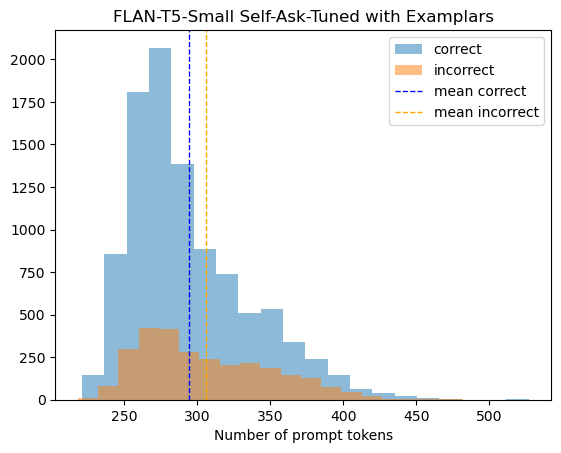

In [ ]:
plot_context_size_distributions(context_flan_t5_self_ask_with_examplars, title="FLAN-T5-Small Self-Ask-Tuned with Examplars")

### Direct Tuning

In [ ]:
t5_direct_without_examplars = load_results(model="t5-small", finetuning="direct", examplars=False)
t5_direct_without_examplars.head()

,correct,bleu-1,bleu-2,rouge-1,rouge-2,rouge-L,F1-1,F1-2
0,False,0.0,0.0,0.0,0.00,0.0,0.000000,0.000000
1,True,1.0,1.0,1.0,1.00,1.0,1.000000,1.000000
2,True,1.0,1.0,1.0,1.00,1.0,1.000000,1.000000
3,False,1.0,1.0,0.8,0.75,0.8,0.888889,0.857143
4,True,1.0,1.0,1.0,1.00,1.0,1.000000,1.000000


In [ ]:
test = pd.DataFrame(load_TestData("data/MultihopEvaluation/direct-without-examplars.json"))
test.head()

,prompt,target,answer,num_prompt_tokens,num_target_tokens,num_tokens
0,Facts:\nFact #0: (Wojna polsko-ruska) is a 200...,Małgorzata Braunek,Małgorzata Braunek,122,10,132
1,Facts:\nFact #0: Blind Shaft is a 2003 film ab...,The Mask Of Fu Manchu,The Mask Of Fu Manchu,83,6,89
2,Facts:\nFact #0: John was the second (but elde...,12 June 1516,12 June 1516,145,4,149
3,Facts:\nFact #0: Wearing Velvet Slippers under...,Myanmar Motion Picture Academy Awards,Myanmar Motion Picture Academy Awards,135,5,140
4,Facts:\nFact #0: Ronnie Rocket is an unfinishe...,"Missoula, Montana","Missoula, Montana",97,5,102


In [ ]:
context_t5_direct_without_examplars = pd.concat([t5_direct_without_examplars, test.loc[:, ["num_prompt_tokens"]]], axis=1)
context_t5_direct_without_examplars.head()

,correct,bleu-1,bleu-2,rouge-1,rouge-2,rouge-L,F1-1,F1-2,num_prompt_tokens
0,False,0.0,0.0,0.0,0.00,0.0,0.000000,0.000000,122
1,True,1.0,1.0,1.0,1.00,1.0,1.000000,1.000000,83
2,True,1.0,1.0,1.0,1.00,1.0,1.000000,1.000000,145
3,False,1.0,1.0,0.8,0.75,0.8,0.888889,0.857143,135
4,True,1.0,1.0,1.0,1.00,1.0,1.000000,1.000000,97


In [ ]:
correlate_context_size(context_t5_direct_without_examplars)

correct   -0.207553
bleu-1    -0.211320
bleu-2    -0.025068
rouge-1   -0.215771
rouge-2   -0.026692
rouge-L   -0.215952
F1-1      -0.209324
F1-2      -0.024014
Name: num_prompt_tokens, dtype: float64

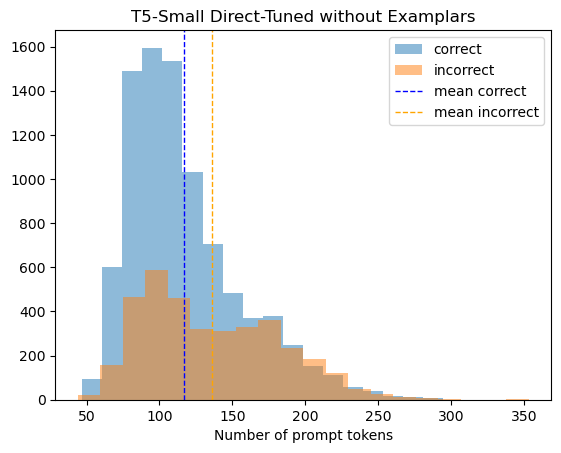

In [ ]:
plot_context_size_distributions(context_t5_direct_without_examplars, title="T5-Small Direct-Tuned without Examplars")

### Baseline

In [ ]:
flan_t5_baseline_with_examplars = load_results(model="flan-t5-small", finetuning=None, examplars=True)
flan_t5_baseline_with_examplars.head()

,correct,bleu-1,bleu-2,rouge-1,rouge-2,rouge-L,F1-1,F1-2
0,True,1.0,1.0,0.057143,0.029412,0.057143,0.108108,0.057143
1,False,1.0,1.0,0.050000,0.025641,0.050000,0.095238,0.050000
2,True,1.0,1.0,0.061224,0.041667,0.061224,0.115385,0.080000
3,False,0.5,0.0,0.022727,0.000000,0.022727,0.043478,0.000000
4,True,1.0,1.0,0.055556,0.028571,0.055556,0.105263,0.055556


In [ ]:
test = pd.DataFrame(load_TestData("data/MultihopEvaluation/baseline-with-examplars.json"))
test.head()

,prompt,target,answer,num_prompt_tokens,num_target_tokens,num_tokens
0,Examples:\nSTART\nQuestion: When was Neva Egan...,Yes.\nFollow up: Who is the director of Polish...,Małgorzata Braunek,281,81,362
1,Examples:\nSTART\nQuestion: When was Neva Egan...,Yes.\nFollow up: When is the publication date ...,The Mask Of Fu Manchu,242,52,294
2,Examples:\nSTART\nQuestion: When was Neva Egan...,Yes.\nFollow up: Who is the father of John V o...,12 June 1516,304,75,379
3,Examples:\nSTART\nQuestion: When was Neva Egan...,Yes.\nFollow up: Who is the director of Wearin...,Myanmar Motion Picture Academy Awards,294,65,359
4,Examples:\nSTART\nQuestion: When was Neva Egan...,Yes.\nFollow up: Who is the director of Ronnie...,"Missoula, Montana",256,51,307


In [ ]:
context_flan_t5_baseline_with_examplars = pd.concat([flan_t5_baseline_with_examplars, test.loc[:, ["num_prompt_tokens"]]], axis=1)
context_flan_t5_baseline_with_examplars.head()

,correct,bleu-1,bleu-2,rouge-1,rouge-2,rouge-L,F1-1,F1-2,num_prompt_tokens
0,True,1.0,1.0,0.057143,0.029412,0.057143,0.108108,0.057143,281
1,False,1.0,1.0,0.050000,0.025641,0.050000,0.095238,0.050000,242
2,True,1.0,1.0,0.061224,0.041667,0.061224,0.115385,0.080000,304
3,False,0.5,0.0,0.022727,0.000000,0.022727,0.043478,0.000000,294
4,True,1.0,1.0,0.055556,0.028571,0.055556,0.105263,0.055556,256


In [ ]:
correlate_context_size(context_flan_t5_baseline_with_examplars)

correct   -0.090983
bleu-1     0.145460
bleu-2     0.172340
rouge-1   -0.057822
rouge-2    0.038680
rouge-L   -0.055538
F1-1      -0.050723
F1-2       0.045293
Name: num_prompt_tokens, dtype: float64

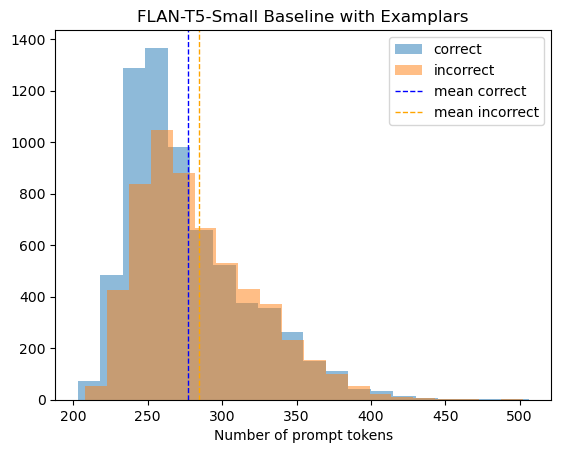

In [ ]:
plot_context_size_distributions(context_flan_t5_baseline_with_examplars, title="FLAN-T5-Small Baseline with Examplars")

## Manual Inspection

### Self-Ask Tuning

In [6]:
test = pd.DataFrame(load_TestData("data/MultihopEvaluation/self-ask-with-examplars.json"))

In [7]:
self_ask_responses = load_responses(model="flan-t5-small", finetuning="self-ask", examplars=True)
self_ask_responses = pd.concat([self_ask_responses, flan_t5_self_ask_with_examplars, test[["prompt", "target"]]], axis=1)
self_ask_responses.head(1)

,response,answer,self_ask,correct,bleu-1,bleu-2,rouge-1,rouge-2,rouge-L,F1-1,F1-2,prompt,target
0,Yes. Follow up: Who is the director of Polish-...,Magorzata Braunek,True,True,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Examples:\nSTART\nQuestion: When was Neva Egan...,Yes.\nFollow up: Who is the director of Polish...


In [ ]:
top_five = self_ask_responses.sort_values(by='F1-2', ascending=False).head(5)
bottom_five = self_ask_responses.sort_values(by='F1-2', ascending=False).tail(5)
random_five = self_ask_responses.sample(5)

# write to markdown file
with open("flan-t5-small-self-ask-with-examplars-examples.md", "w") as f:
    f.write("# Flan-T5-Small Self-Ask-Tuned with Examplars\n")
    f.write("## Top Five Examples\n")
    for index, row in top_five.iterrows():
        f.write(f"### Example {index + 1}\n")
        f.write(f"Prompt:\n```\n{row['prompt']}```\n")
        f.write(f"Target:\n```\n{row['target']}```\n")
        f.write(f"Response:\n```\n{row['response']}\n```\n")
        f.write("\n")

    f.write("## Bottom Five Examples\n")
    for index, row in bottom_five.iterrows():
        f.write(f"### Example {index + 1}\n")
        f.write(f"Prompt:\n```\n{row['prompt']}```\n")
        f.write(f"Target:\n```\n{row['target']}```\n")
        f.write(f"Response:\n```\n{row['response']}\n```\n")
        f.write("\n")

    f.write("## Random Five Examples\n")
    for index, row in random_five.iterrows():
        f.write(f"### Example {index + 1}\n")
        f.write(f"Prompt:\n```\n{row['prompt']}```\n")
        f.write(f"Target:\n```\n{row['target']}```\n")
        f.write(f"Response:\n```\n{row['response']}\n```\n")
        f.write("\n")

### Direct Tuning

In [ ]:
test = pd.DataFrame(load_TestData("data/MultihopEvaluation/direct-without-examplars.json"))

In [ ]:
direct_responses = load_responses(model="t5-small", finetuning="direct", examplars=False)
direct_responses = pd.concat([direct_responses, t5_direct_without_examplars, test[["prompt", "target"]]], axis=1)
direct_responses.head(1)

,response,answer,self_ask,correct,bleu-1,bleu-2,rouge-1,rouge-2,rouge-L,F1-1,F1-2,prompt,target
0,Andrzej uawski,Andrzej uawski,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Facts:\nFact #0: (Wojna polsko-ruska) is a 200...,Małgorzata Braunek


In [ ]:
top_five = direct_responses.sort_values(by='F1-1', ascending=False).head(5)
bottom_five = direct_responses.sort_values(by='F1-1', ascending=False).tail(5)
random_five = direct_responses.sample(5)

# write to markdown file
with open("t5-small-direct-without-examplars-examples.md", "w") as f:
    f.write("# T5-Small Direct-Tuned without Examplars\n")
    f.write("## Top Five Examples\n")
    for index, row in top_five.iterrows():
        f.write(f"### Example {index + 1}\n")
        f.write(f"Prompt:\n```\n{row['prompt']}\n```\n")
        f.write(f"Target:\n```\n{row['target']}\n```\n")
        f.write(f"Response:\n```\n{row['response']}\n```\n")
        f.write("\n")

    f.write("## Bottom Five Examples\n")
    for index, row in bottom_five.iterrows():
        f.write(f"### Example {index + 1}\n")
        f.write(f"Prompt:\n```\n{row['prompt']}\n```\n")
        f.write(f"Target:\n```\n{row['target']}\n```\n")
        f.write(f"Response:\n```\n{row['response']}\n```\n")
        f.write("\n")

    f.write("## Random Five Examples\n")
    for index, row in random_five.iterrows():
        f.write(f"### Example {index + 1}\n")
        f.write(f"Prompt:\n```\n{row['prompt']}\n```\n")
        f.write(f"Target:\n```\n{row['target']}\n```\n")
        f.write(f"Response:\n```\n{row['response']}\n```\n")
        f.write("\n")

### Baseline

In [ ]:
test = pd.DataFrame(load_TestData("data/MultihopEvaluation/baseline-with-examplars.json"))

In [ ]:
baseline_responses = load_responses(model="flan-t5-small", finetuning=None, examplars=True)
baseline_responses = pd.concat([baseline_responses, flan_t5_baseline_with_examplars, test[["prompt", "target"]]], axis=1)
baseline_responses.head(1)

,response,answer,self_ask,correct,bleu-1,bleu-2,rouge-1,rouge-2,rouge-L,F1-1,F1-2,prompt,target
0,Magorzata Braunek,Magorzata Braunek,False,True,1.0,1.0,0.057143,0.029412,0.057143,0.108108,0.057143,Examples:\nSTART\nQuestion: When was Neva Egan...,Yes.\nFollow up: Who is the director of Polish...


In [ ]:
baseline_responses.self_ask.value_counts()

False    12576
Name: self_ask, dtype: int64

In [ ]:
top_five = baseline_responses.sort_values(by='bleu-1', ascending=False).head(5)
bottom_five = baseline_responses.sort_values(by='bleu-1', ascending=False).tail(5)
random_five = baseline_responses.sample(5)

# write to markdown file
with open("flan-t5-small-baseline-with-examplars-examples.md", "w") as f:
    f.write("# Flan-T5-Small Baseline with Examplars\n")
    f.write("## Top Five Examples\n")
    for index, row in top_five.iterrows():
        f.write(f"### Example {index + 1}\n")
        f.write(f"Prompt:\n```\n{row['prompt']}\n```\n")
        f.write(f"Target:\n```\n{row['target']}\n```\n")
        f.write(f"Response:\n```\n{row['response']}\n```\n")
        f.write("\n")

    f.write("## Bottom Five Examples\n")
    for index, row in bottom_five.iterrows():
        f.write(f"### Example {index + 1}\n")
        f.write(f"Prompt:\n```\n{row['prompt']}\n```\n")
        f.write(f"Target:\n```\n{row['target']}\n```\n")
        f.write(f"Response:\n```\n{row['response']}\n```\n")
        f.write("\n")

    f.write("## Random Five Examples\n")
    for index, row in random_five.iterrows():
        f.write(f"### Example {index + 1}\n")
        f.write(f"Prompt:\n```\n{row['prompt']}\n```\n")
        f.write(f"Target:\n```\n{row['target']}\n```\n")
        f.write(f"Response:\n```\n{row['response']}\n```\n")
        f.write("\n")

## Inspect Attention Weights

In [132]:
from evaluation import EvaluationConfig, load_model, tokenize, decode

In [9]:
config = EvaluationConfig(model="flan-t5-small-self-ask", examplars=True, data_path="", results_path="")
model = load_model(config)

2023-07-27 23:21:25.104 | INFO     | evaluation:_set_t5_tokenizer:114 - Loading tokenizer google/flan-t5-small with max length of 300


You are using the legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This means that tokens that come after special tokens will not be properly handled. We recommend you to read the related pull request available at https://github.com/huggingface/transformers/pull/24565


/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
All model checkpoint layers were used when initializing TFT5ForConditionalGeneration.

All the layers of TFT5ForConditionalGeneration were initialized from the model checkpoint at google/flan-t5-small.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


2023-07-27 23:21:50.977 | INFO     | evaluation:load_model:161 - Loading finetuned model weights from: models/flan-t5-small-self-ask.h5


In [11]:
prompt = self_ask_responses.sort_values(by='F1-2', ascending=False).head(1)["prompt"][0]
output = self_ask_responses.sort_values(by='F1-2', ascending=False).head(1)["response"][0]

prompt_tokens = tokenize([prompt], config)
output_tokens = tokenize([output], config)
result = model(
    input_ids=prompt_tokens.input_ids,
    decoder_input_ids=output_tokens.input_ids,
    output_attentions=True)

Output is tuple of (batch_size, num_heads, decoder sequence_length, encoder sequence_length) tensors, one for each layer.

8 layers

In [12]:
len(result.cross_attentions)

8

In [13]:
top_layer = result.cross_attentions[7]

In [14]:
top_layer.shape

TensorShape([1, 6, 74, 297])

In [15]:
len(prompt_tokens.input_ids[0])

297

In [17]:
len(output_tokens.input_ids[0])

74

In [45]:
def split_input_string(input_string):
    # Find the starting and ending indices of each section
    examples_start = input_string.find("Examples:")
    examples_end = input_string.find("Facts:")

    input_string = input_string[examples_end:]

    facts_start = input_string.find("Facts:")
    facts_end = input_string.find("Question:")
    question_start = input_string.find("Question:")

    # Extract each section into separate substrings
    examples = input_string[examples_start:examples_end].strip() if examples_start >= 0 else ""
    facts = input_string[facts_start:facts_end].strip() if facts_start >= 0 else ""
    question = input_string[question_start:].strip() if question_start >= 0 else ""

    return examples, facts, question

In [46]:
examples, facts, question = split_input_string(prompt)

In [51]:
examples_idx = len(tokenize([examples], config).input_ids[0])
facts_idx = len(tokenize([facts], config).input_ids[0])
question_idx = len(tokenize([question], config).input_ids[0])

In [54]:
examples_idx + facts_idx + question_idx

257

Next steps:
1. For each attention head
2. Iterate over output
3. Compute attention distribution over input sequence.
4. Show the evolution of what it pays attention to as it runs through the output

In [20]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


### Heat Map of Layer and Head

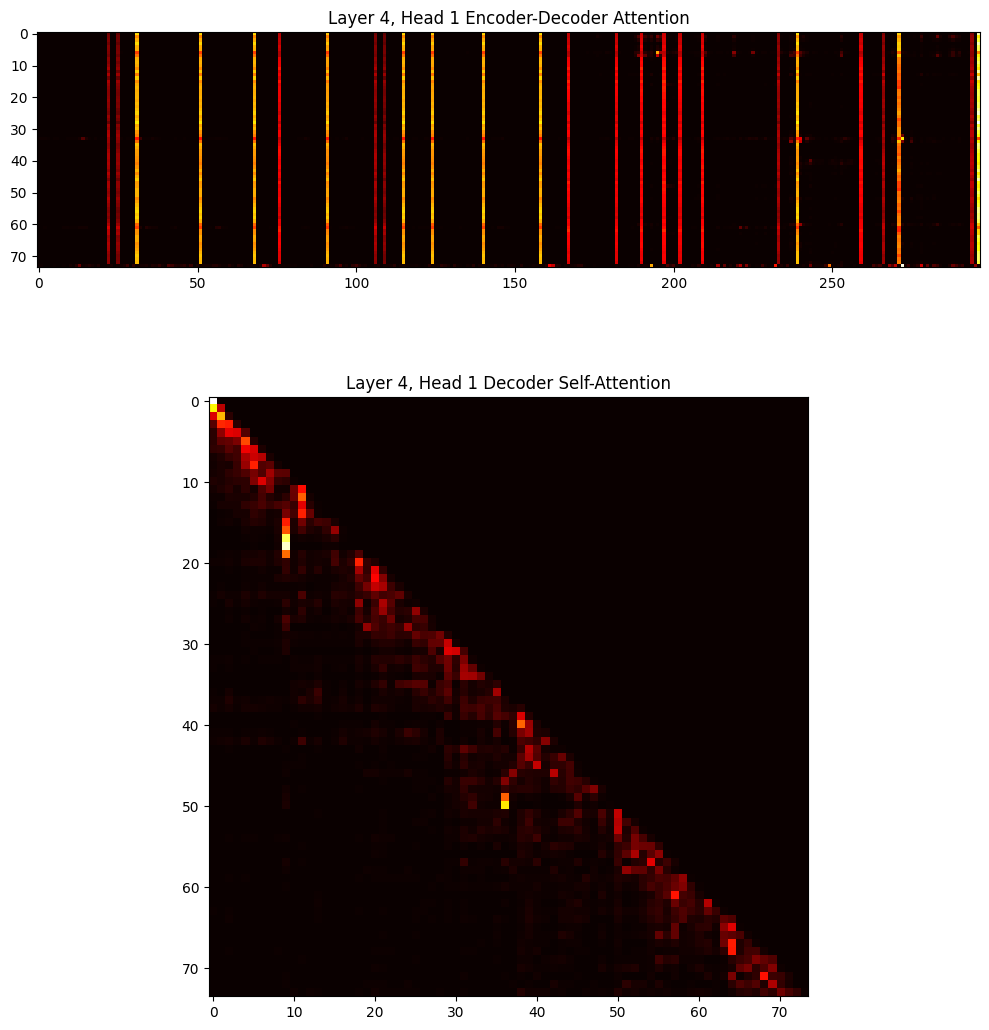

In [140]:
head_idx=0
batch_idx=0
layer_idx=3
tokenizer = config.tokenizer_

top_cross_layer = result.cross_attentions[layer_idx]
attention_weights_encoder_decoder = top_cross_layer[batch_idx, head_idx, :, :]
top_dec_layer = result.decoder_attentions[layer_idx]
attention_weights_decoder_self = top_dec_layer[batch_idx, head_idx, :, :]

input_ids = prompt_tokens.input_ids
output_ids = output_tokens.input_ids

# Step 4: Visualize the attention maps using matplotlib
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Encoder-Decoder (Cross-Attention) Attention Map
axes[0].imshow(attention_weights_encoder_decoder, cmap="hot", interpolation="nearest")
axes[0].set_title(f"Layer {layer_idx + 1}, Head {head_idx + 1} Encoder-Decoder Attention")

# Decoder Self-Attention Map
axes[1].imshow(attention_weights_decoder_self, cmap="hot", interpolation="nearest")
axes[1].set_title(f"Layer {layer_idx + 1}, Head {head_idx + 1} Decoder Self-Attention")

plt.tight_layout()
plt.show()

### What are the top N words the model attends to?

In [137]:
def agg_weights_for_words(token_ids, weights):
  tokens = tokenizer.convert_ids_to_tokens(token_ids)
  new_tokens = []
  new_weights = []
  # initialize
  weight_agg = weights[0]
  token_agg = tokens[0]
  for token, weight in zip(tokens[1:], weights[1:]):
    if token[0] == "▁":
      new_tokens.append(token_agg)
      new_weights.append(weight_agg)
      weight_agg = weight
      token_agg = token
    else:
      weight_agg += weight
      token_agg += token
  new_tokens.append(token_agg)
  new_weights.append(weight_agg)
  return new_tokens, new_weights

In [147]:
def extract_top_words(words, weights, n=5):
    # Combine the words and weights into pairs
    word_weight_pairs = list(zip(words, weights))

    # Sort the pairs based on weights in descending order
    sorted_pairs = sorted(word_weight_pairs, key=lambda x: x[1], reverse=True)

    # Extract the top five words and their weights
    top_five_words = [pair[0] for pair in sorted_pairs[:n]]
    top_five_weights = [pair[1] for pair in sorted_pairs[:n]]

    return top_five_words, top_five_weights

In [124]:
def extract_attention_distribution(text, decoder_ids, weights):
  search_ids = tokenize([text], config).input_ids[0][:-1]  # remove </s> at the end
  search_tokens = tokenizer.convert_ids_to_tokens(search_ids)
  size = len(search_ids)
  decoder_tokens = tokenizer.convert_ids_to_tokens(decoder_ids)
  start_idx = 0
  end_idx = size
  while end_idx <= len(decoder_tokens):
    window = decoder_tokens[start_idx:end_idx]
    # print(window)
    # break
    if search_tokens == window:
      att_weights = weights[start_idx:end_idx, :]
      return att_weights
    else:
      start_idx +=1
      end_idx +=1
  print("Did not find match.")

In [152]:
print(prompt)

Examples:
START
Question: When was Neva Egan's husband born?
Are follow up questions needed here: Yes.
Follow up: Who is the spouse of Neva Egan?
Intermediate answer: William Allen Egan
Follow up: When is the date of birth of William Allen Egan?
Intermediate answer: October 8, 1914
So the final answer is: October 8, 1914
END

START
Question: Who was born first, Alejo Mancisidor or Emil Leyde?
Are follow up questions needed here: Yes.
Follow up: When is the date of birth of Alejo Mancisidor?
Intermediate answer: 31 July 1970
Follow up: When is the date of birth of Emil Leyde?
Intermediate answer: 8 January 1879
So the final answer is: Emil Leyde
END

Facts:
Fact #0: (Wojna polsko-ruska) is a 2009 Polish film directed by Xawery Żuławski based on the novel Polish-Russian War under the white-red flag by Dorota Masłowska.
Fact #1: He is the son of actress Małgorzata Braunek and director Andrzej Żuławski.

Question: Who is the mother of the director of film Polish-Russian War (Film)?
Are fol

In [108]:
output

'Yes. Follow up: Who is the director of Polish-Russian War? Intermediate answer: Xawery uawski Follow up: Who is the mother of Xawery uawski? Intermediate answer: Magorzata Braunek So the final answer is: Magorzata Braunek'

In [156]:
layer_idx = 7 # layer 8
cross_layer = result.cross_attentions[layer_idx]
for head_idx in range(cross_layer.shape[1]):
  # head_idx = 0 # head 1
  weights = cross_layer[0, head_idx, :, :]
  output_ids = output_tokens.input_ids[0]
  att = extract_attention_distribution("Who is the director", output_ids, weights)
  agg_att_weights = tf.nn.softmax(tf.reduce_sum(att, axis=0), axis=0)
  # agg_att_weights = tf.reduce_sum(att, axis=0)
  prompt_words, prompt_weights = agg_weights_for_words(prompt_tokens.input_ids[0], agg_att_weights)
  # prompt_words, prompt_weights = agg_weights_for_words(prompt_tokens.input_ids[0], tf.nn.softmax(tf.reduce_sum(weights, axis=0), axis=0))
  top_words, top_weights = extract_top_words(prompt_words, prompt_weights, 10)
  print("Head:", head_idx, top_words)

Head: 0 ['▁<unk>u<unk>awski.', '▁<unk>u<unk>awski', '▁Mancisidor?', '▁polsko-ruska)', '▁Ma<unk>gorzata', '▁Mancisidor', '▁(Film)?', '▁(Wojna', '▁Xawery', '▁Mas<unk>owska.']
Head: 1 ['▁<unk>u<unk>awski.', '▁Mancisidor?', '▁<unk>u<unk>awski', '▁polsko-ruska)', '▁Ma<unk>gorzata', '▁Mancisidor', '▁(Film)?', '▁(Wojna', '▁Xawery', '▁Mas<unk>owska.']
Head: 2 ['▁<unk>u<unk>awski.', '▁Mancisidor?', '▁<unk>u<unk>awski', '▁polsko-ruska)', '▁Ma<unk>gorzata', '▁Mancisidor', '▁(Wojna', '▁(Film)?', '▁Xawery', '▁Mas<unk>owska.']
Head: 3 ['▁<unk>u<unk>awski.', '▁polsko-ruska)', '▁<unk>u<unk>awski', '▁Mancisidor?', '▁Ma<unk>gorzata', '▁(Film)?', '▁Mancisidor', '▁(Wojna', '▁Xawery', '▁Mas<unk>owska.']
Head: 4 ['▁<unk>u<unk>awski.', '▁polsko-ruska)', '▁Mancisidor?', '▁<unk>u<unk>awski', '▁Ma<unk>gorzata', '▁(Film)?', '▁Mancisidor', '▁(Wojna', '▁Xawery', '▁Mas<unk>owska.']
Head: 5 ['▁<unk>u<unk>awski.', '▁Mancisidor?', '▁<unk>u<unk>awski', '▁polsko-ruska)', '▁Ma<unk>gorzata', '▁Mancisidor', '▁(Wojna', '▁(F

### Visualize attention patterns across heads and layers

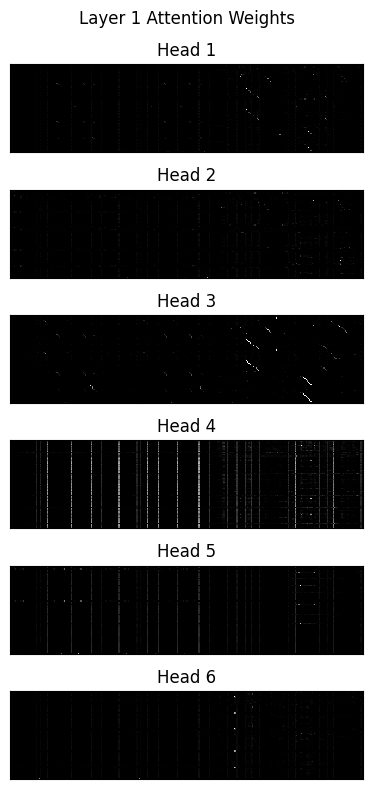

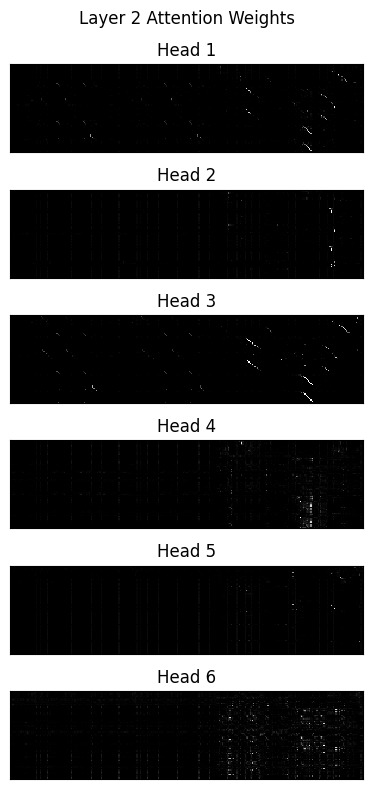

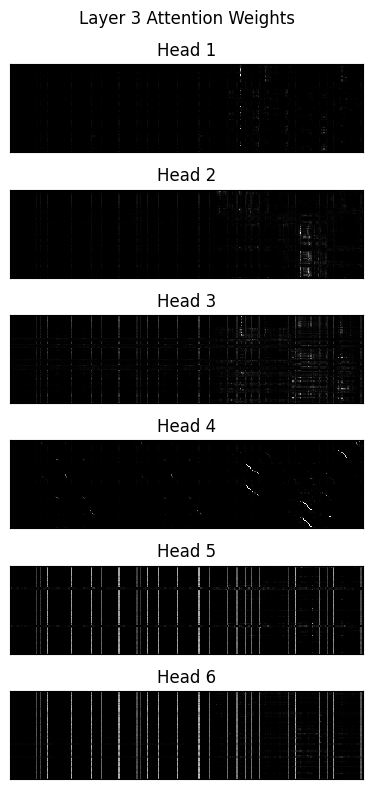

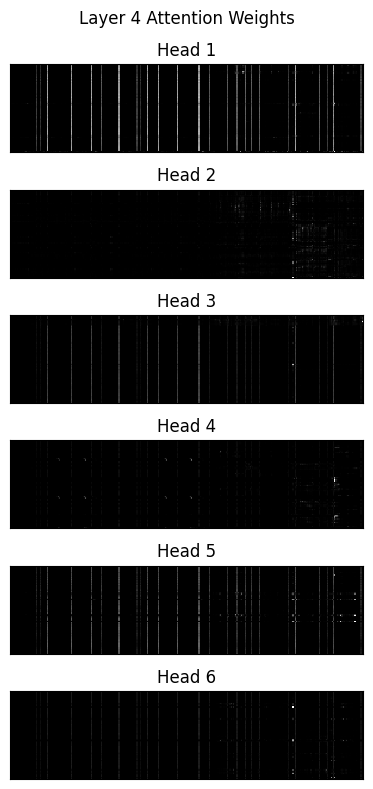

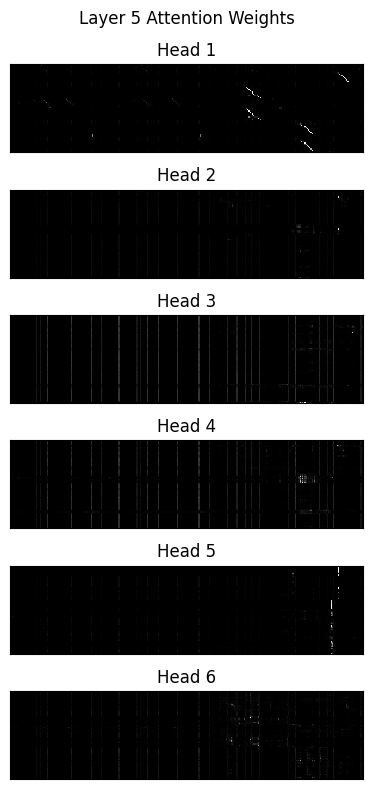

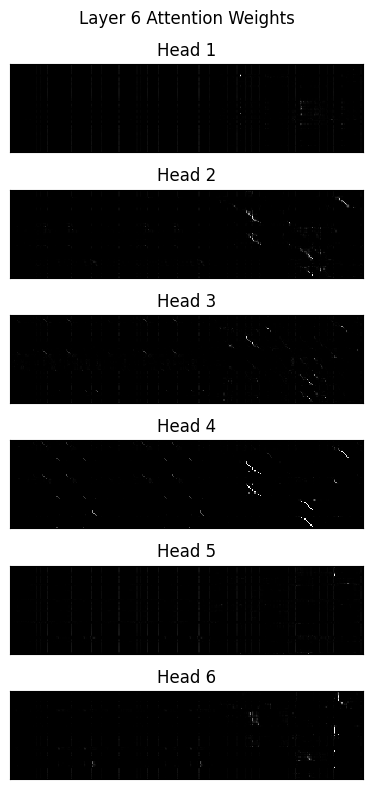

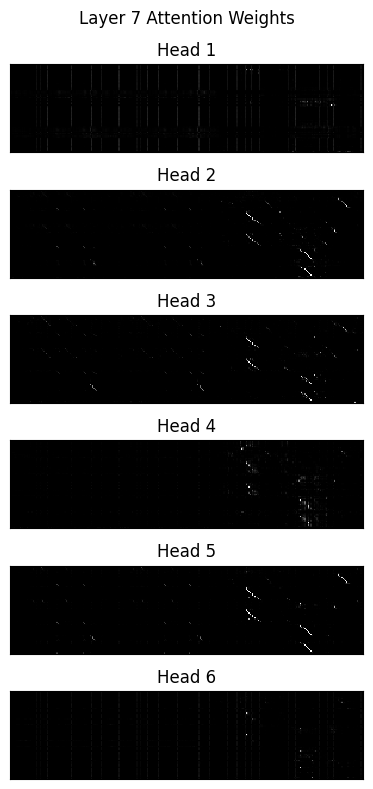

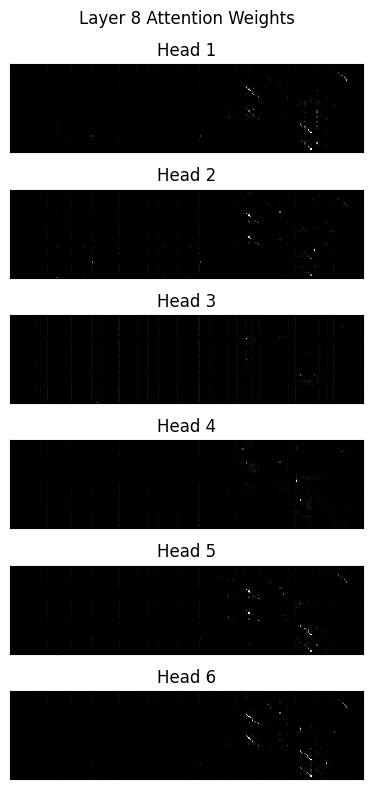

In [19]:
# Iterate through each layer's attention weights
for layer_idx, layer_attention in enumerate(result.cross_attentions):
    fig, axes = plt.subplots(len(layer_attention[0]), 1, figsize=(10, 8))
    fig.suptitle(f"Layer {layer_idx + 1} Attention Weights")

    # Iterate through each head's attention weights in the layer
    for head_idx, head_attention in enumerate(layer_attention[0]):
        axes[head_idx].imshow(head_attention, cmap="gray", interpolation="nearest")
        axes[head_idx].set_xticks([])
        axes[head_idx].set_yticks([])
        axes[head_idx].set_title(f"Head {head_idx + 1}")

    plt.tight_layout()
    plt.show()